In [101]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
month = list(range(1,13,1))

In [12]:
month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [13]:
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [23]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      Min, [-40, 20, 0])


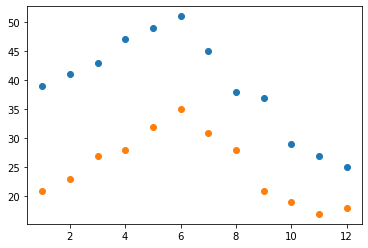

In [26]:
plt.scatter(month, Max)
plt.scatter(month, Min)

Text(0, 0.5, 'Temperature')

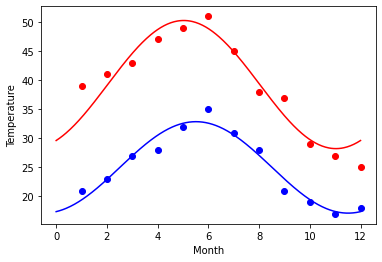

In [38]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(month, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')


In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [43]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [89]:
male = (df["sex"] == "male").sum()

In [90]:
female = (df["sex"] == "female").sum()

In [91]:
value= [male, female]

([<matplotlib.patches.Wedge at 0x7f9fee5b4fd0>,
 [Text(-0.48083677220945115, 0.9893411941747885, ''),
  Text(0.48083667958064136, -0.9893412391939718, '')])

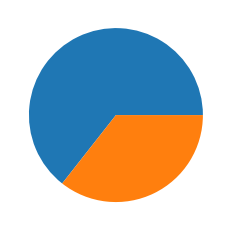

In [92]:
plt.pie(value)

In [94]:
df["fare"]

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
1309         NaN
Name: fare, Length: 1310, dtype: float64

In [95]:
df["age"]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
1309        NaN
Name: age, Length: 1310, dtype: float64

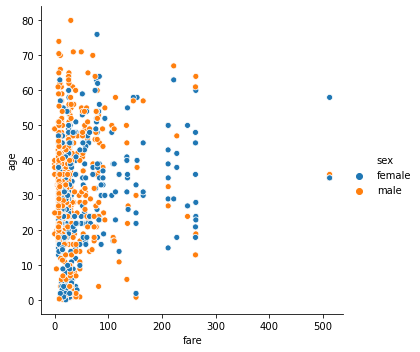

In [102]:
sns.relplot(data=df, x = "fare", y = "age", hue = "sex")